# Read in data

In [1]:
# https://www.kaggle.com/datasets/jackksoncsie/spam-email-dataset
# https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l10c02_nlp_multiple_models_for_predicting_sentiment.ipynb#scrollTo=jzBM1PpJAYfD
import pandas as pd
emails = pd.read_csv('emails.csv')

In [2]:
emails

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [3]:
emails['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

<Axes: xlabel='spam', ylabel='number emails'>

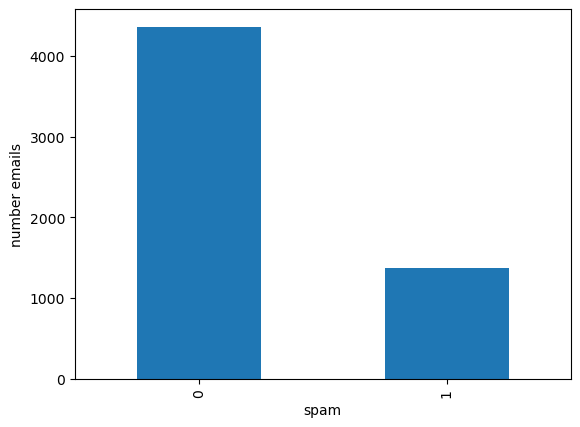

In [4]:
emails['spam'].value_counts().plot.bar(ylabel='number emails', xlabel='spam')
# a little imbalanced but will try models without balancing first

# Split the dataset

In [5]:
# import packages
import numpy as np
from sklearn.model_selection import train_test_split


  
X= emails['text']
y= emails['spam']
  
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=42, 
                                   test_size=0.25, 
                                   shuffle=True)

In [6]:
X_train

274     Subject: reduction in high blood pressure  age...
4923    Subject: directions to the tamiment resort and...
1361    Subject: avoid fake viagra get the real thing ...
3528    Subject: re :  dave ,  both days .  vince  dav...
1580    Subject: re : eci id for stinson  steve -  cou...
                              ...                        
3772    Subject: john sherriff ' s copper position  te...
5191    Subject: the national forum on corporate finan...
5226    Subject: re : my first draft  quentin ,  i for...
5390    Subject: why johan dahl and the mri energy sta...
860     Subject: perfect visual solution for your busi...
Name: text, Length: 4296, dtype: object

In [7]:
y_train

274     1
4923    0
1361    1
3528    0
1580    0
       ..
3772    0
5191    0
5226    0
5390    0
860     1
Name: spam, Length: 4296, dtype: int64

# Preprocess text

In [8]:
results = set()
X_train.str.lower().str.split().apply(results.update)
len(results)
# 32755 unique words

32755

In [9]:
vocab_size = 4000
embedding_dim = 16
max_length = 50
trunc_type='post'
pad_type='post'
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index


In [10]:
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences,maxlen=max_length, 
                                truncating=trunc_type, padding=pad_type)

validation_sequences = tokenizer.texts_to_sequences(X_test)
validation_padded = pad_sequences(validation_sequences,maxlen=max_length)

training_labels_final = np.array(y_train)
validation_labels_final = np.array(y_test)

# Dense

In [11]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),  
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            64000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 64,017
Trainable params: 64,017
Non-trainable params: 0
_________________________________________________________________


In [12]:
num_epochs = 20
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, 
                    validation_data=(validation_padded, validation_labels_final))

Epoch 1/20
135/135 [==============================] - 1s 2ms/step - loss: 0.6075 - accuracy: 0.7663 - val_loss: 0.5614 - val_accuracy: 0.7423
Epoch 2/20
135/135 [==============================] - 0s 1ms/step - loss: 0.4571 - accuracy: 0.7835 - val_loss: 0.4729 - val_accuracy: 0.7591
Epoch 3/20
135/135 [==============================] - 0s 1ms/step - loss: 0.3497 - accuracy: 0.8270 - val_loss: 0.4038 - val_accuracy: 0.8080
Epoch 4/20
135/135 [==============================] - 0s 1ms/step - loss: 0.2691 - accuracy: 0.8866 - val_loss: 0.3522 - val_accuracy: 0.8582
Epoch 5/20
135/135 [==============================] - 0s 1ms/step - loss: 0.2109 - accuracy: 0.9383 - val_loss: 0.3165 - val_accuracy: 0.8904
Epoch 6/20
135/135 [==============================] - 0s 1ms/step - loss: 0.1706 - accuracy: 0.9604 - val_loss: 0.2880 - val_accuracy: 0.9029
Epoch 7/20
135/135 [==============================] - 0s 1ms/step - loss: 0.1418 - accuracy: 0.9693 - val_loss: 0.2653 - val_accuracy: 0.9029
Epoch 

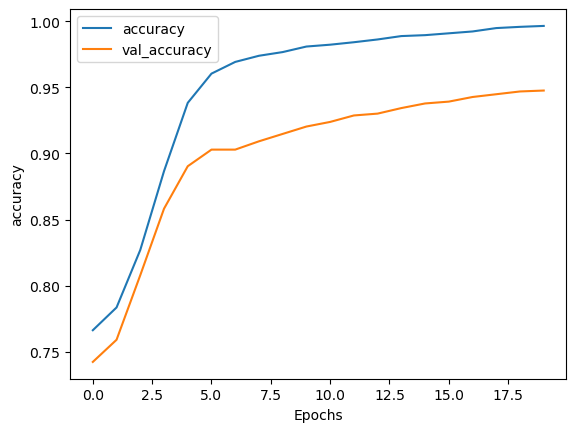

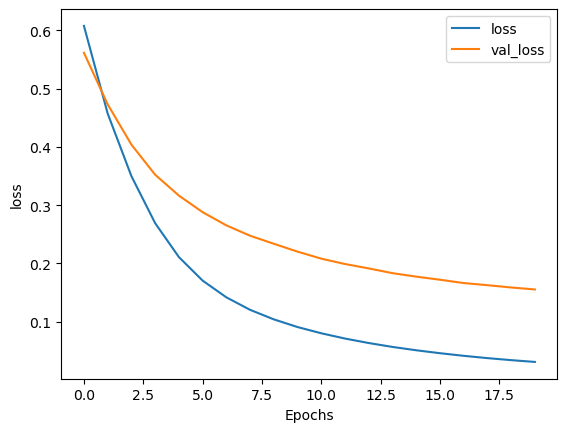

In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [25]:
predicted = np.round(model.predict(validation_padded))
actual = validation_labels_final

45/45 [==============================] - 0s 634us/step


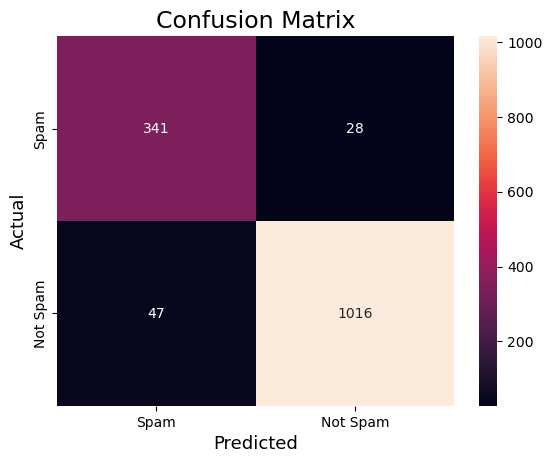

In [29]:
# https://www.geeksforgeeks.org/confusion-matrix-machine-learning/
# https://blogs.oracle.com/ai-and-datascience/post/a-simple-guide-to-building-a-confusion-matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = [1, 0]
cm = confusion_matrix(actual,predicted, labels=labels)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Spam','Not Spam'],
            yticklabels=['Spam','Not Spam'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
# more false positives than false negatives, so the model probably doesn't need any class balancing since it's actually
# predicting spam more often than it should!

In [30]:
sum(actual)

369

In [31]:
sum(predicted)

array([388.], dtype=float32)

# Conv1D

In [18]:
num_epochs = 30

model_cnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(16, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Default learning rate for the Adam optimizer is 0.001
# Let's slow down the learning rate by 10.
learning_rate = 0.0001
model_cnn.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate), 
                  metrics=['accuracy'])
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            64000     
                                                                 
 conv1d (Conv1D)             (None, 46, 16)            1296      
                                                                 
 global_max_pooling1d (Globa  (None, 16)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 65,313
Trainable params: 65,313
Non-trainable params: 0
_________________________________________________________________


In [19]:
history_cnn = model_cnn.fit(training_padded, training_labels_final, epochs=num_epochs, 
                      validation_data=(validation_padded, validation_labels_final))

Epoch 1/30
135/135 [==============================] - 1s 4ms/step - loss: 0.7416 - accuracy: 0.2325 - val_loss: 0.7205 - val_accuracy: 0.2577
Epoch 2/30
135/135 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.2831 - val_loss: 0.6931 - val_accuracy: 0.4623
Epoch 3/30
135/135 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.8419 - val_loss: 0.6757 - val_accuracy: 0.7598
Epoch 4/30
135/135 [==============================] - 0s 3ms/step - loss: 0.6624 - accuracy: 0.8108 - val_loss: 0.6654 - val_accuracy: 0.7430
Epoch 5/30
135/135 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.8063 - val_loss: 0.6547 - val_accuracy: 0.7430
Epoch 6/30
135/135 [==============================] - 0s 3ms/step - loss: 0.6327 - accuracy: 0.7998 - val_loss: 0.6414 - val_accuracy: 0.7430
Epoch 7/30
135/135 [==============================] - 0s 3ms/step - loss: 0.6116 - accuracy: 0.7942 - val_loss: 0.6245 - val_accuracy: 0.7451
Epoch 

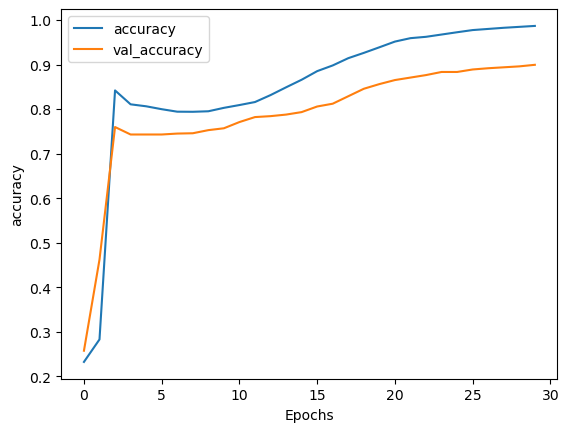

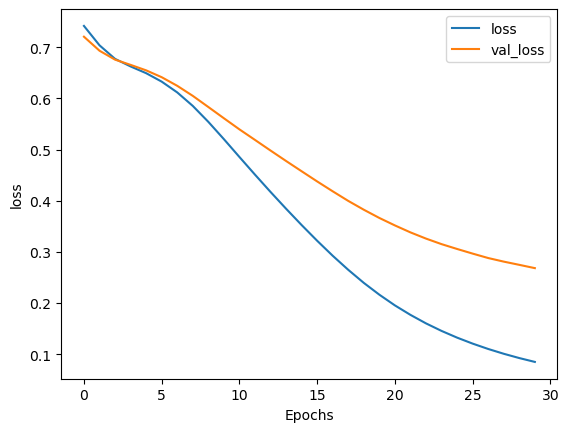

In [20]:
plot_graphs(history_cnn, "accuracy")
plot_graphs(history_cnn, "loss")

In [33]:
predicted = np.round(model_cnn.predict(validation_padded))
actual = validation_labels_final

45/45 [==============================] - 0s 818us/step


In [34]:
model_cnn.predict(validation_padded)

45/45 [==============================] - 0s 841us/step


array([[0.20302358],
       [0.05335171],
       [0.06194705],
       ...,
       [0.00841845],
       [0.7244535 ],
       [0.04047666]], dtype=float32)

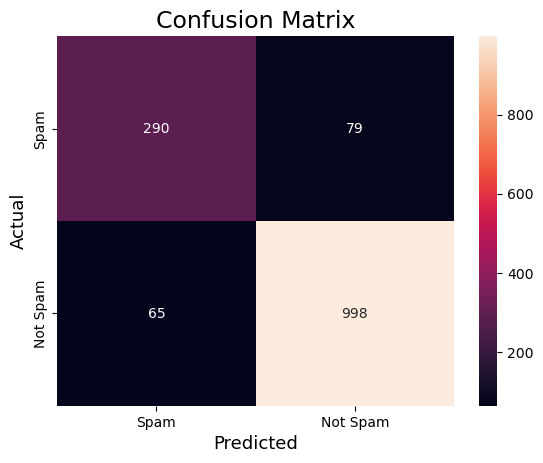

In [35]:

labels = [1, 0]
cm = confusion_matrix(actual,predicted, labels=labels)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Spam','Not Spam'],
            yticklabels=['Spam','Not Spam'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
# in this case we have more false negatives than false positives (though not by a lot). performs more poorly than the
# simpler model

# GRU

In [36]:
num_epochs = 30

model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

learning_rate = 0.00003 # slower than the default learning rate
model_gru.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate),
                  metrics=['accuracy'])

model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 16)            64000     
                                                                 
 bidirectional (Bidirectiona  (None, 64)               9600      
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 73,665
Trainable params: 73,665
Non-trainable params: 0
_________________________________________________________________


In [37]:
history_gru = model_gru.fit(training_padded, training_labels_final, epochs=num_epochs, 
                      validation_data=(validation_padded, validation_labels_final))

Epoch 1/30
135/135 [==============================] - 8s 31ms/step - loss: 0.6845 - accuracy: 0.6986 - val_loss: 0.6768 - val_accuracy: 0.7423
Epoch 2/30
135/135 [==============================] - 3s 26ms/step - loss: 0.6609 - accuracy: 0.7675 - val_loss: 0.6565 - val_accuracy: 0.7423
Epoch 3/30
135/135 [==============================] - 3s 26ms/step - loss: 0.6327 - accuracy: 0.7675 - val_loss: 0.6316 - val_accuracy: 0.7423
Epoch 4/30
135/135 [==============================] - 3s 25ms/step - loss: 0.5990 - accuracy: 0.7675 - val_loss: 0.6027 - val_accuracy: 0.7423
Epoch 5/30
135/135 [==============================] - 3s 26ms/step - loss: 0.5623 - accuracy: 0.7675 - val_loss: 0.5764 - val_accuracy: 0.7423
Epoch 6/30
135/135 [==============================] - 4s 26ms/step - loss: 0.5334 - accuracy: 0.7675 - val_loss: 0.5634 - val_accuracy: 0.7423
Epoch 7/30
135/135 [==============================] - 4s 28ms/step - loss: 0.5164 - accuracy: 0.7675 - val_loss: 0.5567 - val_accuracy: 0.7423

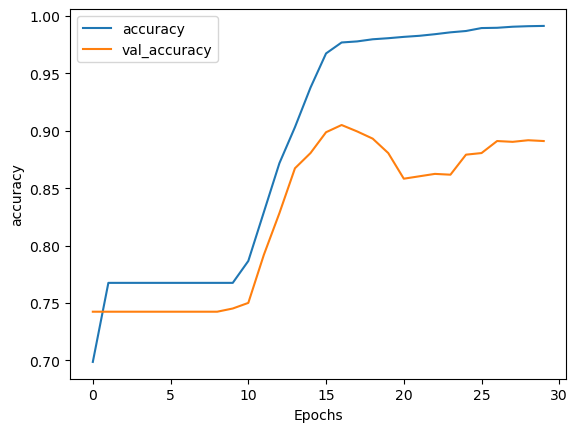

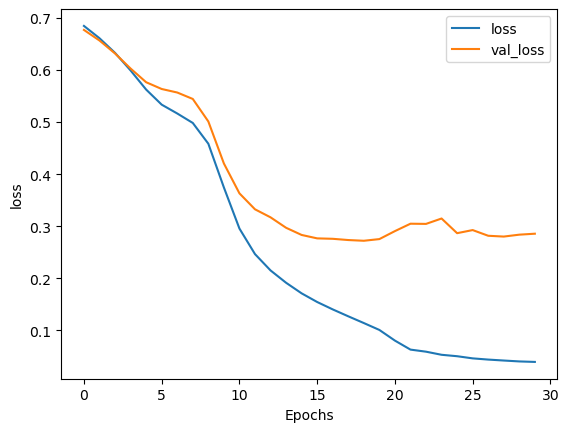

In [41]:
plot_graphs(history_gru, "accuracy")
plot_graphs(history_gru, "loss")

In [42]:
predicted = np.round(model_gru.predict(validation_padded))
actual = validation_labels_final

45/45 [==============================] - 1s 7ms/step


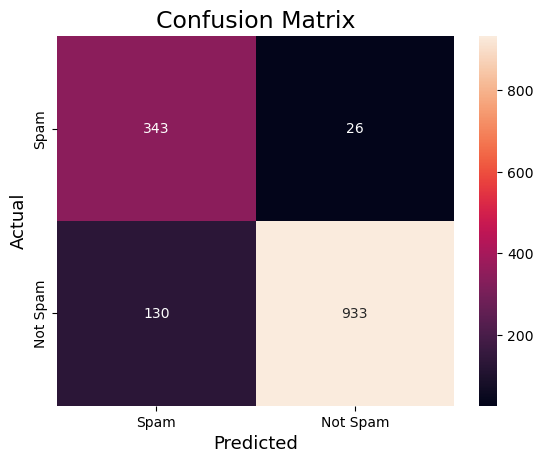

In [43]:
labels = [1, 0]
cm = confusion_matrix(actual,predicted, labels=labels)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Spam','Not Spam'],
            yticklabels=['Spam','Not Spam'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
# A lot of false positives here! Model predicting too much spam.

# Bidirectional LSTM

In [45]:
num_epochs = 30

model_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

learning_rate = 0.00003
model_bidi_lstm.compile(loss='binary_crossentropy',
                        optimizer=tf.keras.optimizers.Adam(learning_rate),
                        metrics=['accuracy'])

model_bidi_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 16)            64000     
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)               4224      
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 68,257
Trainable params: 68,257
Non-trainable params: 0
_________________________________________________________________


In [46]:
history_model_bidi_lstm = model_bidi_lstm.fit(training_padded, training_labels_final, epochs=num_epochs, 
                      validation_data=(validation_padded, validation_labels_final))

Epoch 1/30
135/135 [==============================] - 6s 24ms/step - loss: 0.6886 - accuracy: 0.7086 - val_loss: 0.6850 - val_accuracy: 0.7423
Epoch 2/30
135/135 [==============================] - 2s 18ms/step - loss: 0.6767 - accuracy: 0.7675 - val_loss: 0.6731 - val_accuracy: 0.7423
Epoch 3/30
135/135 [==============================] - 2s 18ms/step - loss: 0.6582 - accuracy: 0.7675 - val_loss: 0.6529 - val_accuracy: 0.7423
Epoch 4/30
135/135 [==============================] - 2s 17ms/step - loss: 0.6233 - accuracy: 0.7675 - val_loss: 0.6105 - val_accuracy: 0.7423
Epoch 5/30
135/135 [==============================] - 3s 19ms/step - loss: 0.5464 - accuracy: 0.7675 - val_loss: 0.5449 - val_accuracy: 0.7423
Epoch 6/30
135/135 [==============================] - 2s 18ms/step - loss: 0.4838 - accuracy: 0.7675 - val_loss: 0.5130 - val_accuracy: 0.7423
Epoch 7/30
135/135 [==============================] - 3s 19ms/step - loss: 0.4310 - accuracy: 0.7675 - val_loss: 0.4655 - val_accuracy: 0.7423

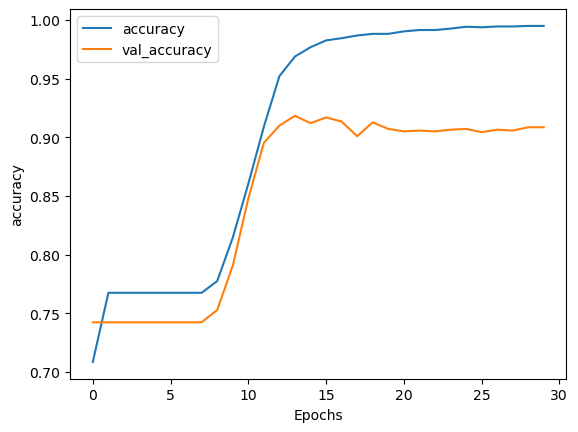

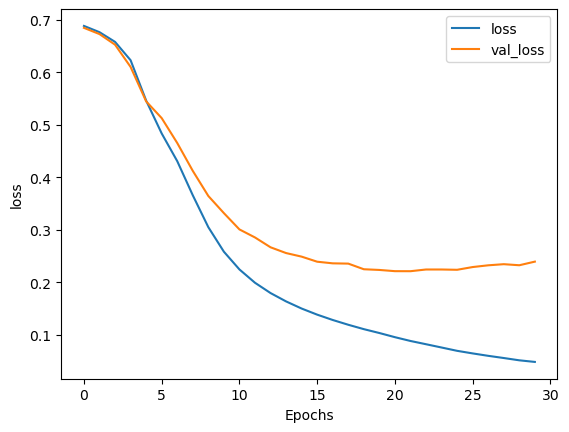

In [47]:
plot_graphs(history_model_bidi_lstm, "accuracy")
plot_graphs(history_model_bidi_lstm, "loss")

In [51]:
predicted = np.round(model_bidi_lstm.predict(validation_padded))
actual = validation_labels_final

45/45 [==============================] - 1s 4ms/step


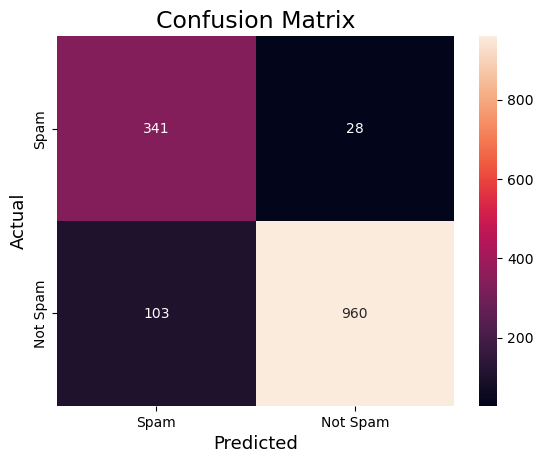

In [52]:
labels = [1, 0]
cm = confusion_matrix(actual,predicted, labels=labels)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Spam','Not Spam'],
            yticklabels=['Spam','Not Spam'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
# only a little better than the gru model

In [ ]:
# Simple Dense model performed the best of the 4 most